In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('adult.csv', na_values=['#NAME?'])

In [ ]:
df.head()

In [ ]:
df['income'].value_counts()

In [ ]:
df['income'] = [0 if x == '<=50K' else 1 for x in df['income']]
X = df.drop('income', axis=1)
y = df['income']

# Basic data cleaning

In [ ]:
X['education'] 

In [ ]:
pd.get_dummies(X['education'].head())

In [ ]:
for col in X.columns:
    if X[col].dtypes == 'object':
        unique_cat = X[col].nunique()
        print(f'Feature: {col} has {unique_cat} unique catgories')

In [ ]:
X['native-country'].value_counts().sort_values()

In [ ]:
X['native-country'] = ['United-States' if x == 'United-States' else 'Other' for x in X['native-country']]

In [ ]:
todummy_list = ['workclass', 'education','marital-status','occupation','relationship','race','gender','native-country']

In [ ]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

In [ ]:
X = dummy_df(X, todummy_list)

In [ ]:
X.head()

# Handling missing data

In [ ]:
X.isnull().sum().sort_values(ascending=False).head()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imputer.fit(X)

In [ ]:
X = pd.DataFrame(data=imputer.transform(X), columns=X.columns)

# More data exploration

# outiler detection

In [ ]:
# tukey
def find_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5 * iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[ (x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [ ]:
outlier_indices, outlier_values = find_outlier_tukey(X['age'])

In [22]:
outlier_values

[79.0,
 80.0,
 90.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 81.0,
 85.0,
 80.0,
 90.0,
 81.0,
 84.0,
 81.0,
 89.0,
 81.0,
 83.0,
 81.0,
 82.0,
 80.0,
 90.0,
 81.0,
 83.0,
 80.0,
 90.0,
 90.0,
 84.0,
 80.0,
 80.0,
 80.0,
 81.0,
 90.0,
 85.0,
 90.0,
 81.0,
 81.0,
 80.0,
 80.0,
 79.0,
 81.0,
 80.0,
 88.0,
 87.0,
 90.0,
 79.0,
 83.0,
 79.0,
 80.0,
 90.0,
 79.0,
 79.0,
 81.0,
 81.0,
 90.0,
 82.0,
 90.0,
 87.0,
 81.0,
 88.0,
 80.0,
 81.0,
 80.0,
 81.0,
 90.0,
 88.0,
 89.0,
 84.0,
 80.0,
 80.0,
 83.0,
 79.0,
 81.0,
 79.0,
 90.0,
 80.0,
 81.0,
 90.0,
 88.0,
 90.0,
 90.0,
 80.0,
 90.0,
 81.0,
 82.0,
 79.0,
 81.0,
 80.0,
 83.0,
 90.0,
 90.0,
 79.0,
 81.0,
 90.0,
 90.0,
 80.0,
 90.0,
 90.0,
 79.0,
 79.0,
 84.0,
 90.0,
 80.0,
 90.0,
 81.0,
 83.0,
 84.0,
 81.0,
 79.0,
 85.0,
 82.0,
 79.0,
 80.0,
 90.0,
 90.0,
 90.0,
 84.0,
 80.0,
 90.0,
 90.0,
 79.0,
 84.0,
 90.0,
 79.0,
 90.0,
 90.0,
 90.0,
 82.0,
 81.0,
 90.0,
 84.0,
 79.0,
 81.0,
 82.0,
 81.0,
 80.0,
 90.0,
 80.0,
 84.0,
 82.0,
 79.0,
 90.0,
 84.0,

In [23]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

In [24]:
def find_outlier_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw='scott',fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < .05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_values = np.asarray(x)[outlier_ind]
    return outlier_ind, outlier_values

In [25]:
# outlier_indices, outlier_values = find_outlier_kde(X['age'])

# Distribution of Features

In [26]:
def plot_histgram(x):
    plt.hist(x, color='grey')
    plt.title(f'Histgram of {x.name}')
    plt.xlabel('Value')
    plt.ylabel('frequency')
    plt.show()

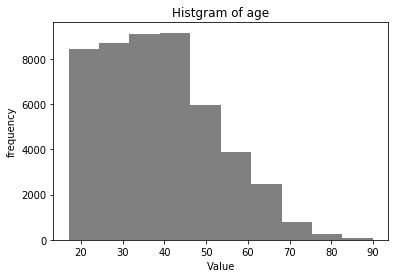

In [27]:
plot_histgram(X['age'])

In [30]:
def plot_histgram_dv(x, y):
    plt.hist(list(x[y==0]), alpha=.5, label='dv-0')
    plt.hist(list(x[y==1]), alpha=.5, label='dv-1')
    plt.title(f'Histgram of {x.name} dv')
    plt.xlabel('Value')
    plt.ylabel('frequency')
    plt.legend(loc='upper right')
    plt.show()

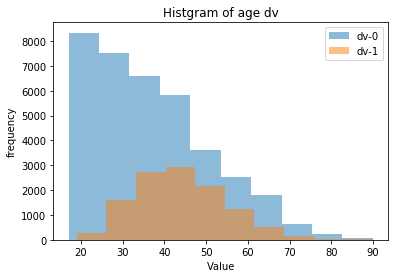

In [32]:
plot_histgram_dv(X['age'], y)

# feature engineering

In [33]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

In [48]:
def add_interactions(df):
    combos = list(combinations(df.columns, 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    noint_indices = [i for i, x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indices], axis=1)
    return df

In [49]:
X1 = add_interactions(X)

In [50]:
X1.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,race_Other_native-country_Other,race_Other_native-country_United-States,race_White_gender_Female,race_White_gender_Male,race_White_native-country_Other,race_White_native-country_United-States,gender_Female_native-country_Other,gender_Female_native-country_United-States,gender_Male_native-country_Other,gender_Male_native-country_United-States
0,25.0,226802.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18.0,103497.0,10.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# B Dimentionality reduction use PCA

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X1))

In [53]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.017217e+08,-1.667885e+07,1.873905e+05,-2.091049e+06,-3.544552e+05,24953.578255,103135.915037,-187429.897545,-64900.400637,69956.915131
1,-2.017239e+08,-1.672363e+07,-4.771779e+06,-6.290287e+05,-3.632957e+05,40006.136847,-95078.435156,-934.343398,34052.746195,39931.442072
2,-2.017189e+08,-1.662251e+07,6.289177e+06,-2.365242e+06,1.158349e+06,-46306.505153,-436786.569157,133290.086404,-11849.117721,18521.773087
3,1.030840e+09,-1.504992e+07,-1.372122e+06,7.329805e+05,-1.450348e+05,-85369.487209,-120519.238403,-2678.185949,26678.139010,-5998.756375
4,-2.017248e+08,-1.674194e+07,-6.785342e+06,-8.440193e+05,1.839778e+05,37700.998363,59157.292399,34898.814847,-5323.369981,-73600.944844


# Feature selection 

In [65]:
import sklearn.feature_selection 
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, train_size=.7, random_state=1)

In [67]:
df.shape

(48842, 15)

In [68]:
X1.shape

(48842, 1891)

In [69]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [70]:
select = sklearn.feature_selection.SelectKBest(k=20)
select_features = select.fit(X_train, y_train)
indices_selected = select_features.get_support(indices=True)

colnames_selected = [X1.columns[i] for i in indices_selected] 

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

[   2   33   53   69  100  120  166  186  203  231  251  417  437 1470
 1479 1481 1483 1817 1819 1821]


/Users/fangzhenfutao/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 350  663  824  829  834  992 1127 1164 1208 1315 1324 1327 1437 1628
 1631] are constant.
  UserWarning)
/Users/fangzhenfutao/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [72]:
def find_model_pref(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    return auc

In [73]:
auc_processed = find_model_pref(X_train_selected, y_train, X_test_selected, y_test)

/Users/fangzhenfutao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
auc_processed

0.6823390107328551